# CS 421: Data Mining - lab 3

## Objectives
1. Applying preprocessing techniques learnt before and see their effects on classification accuracy
2. Exploring different classification models and performing tuning of their parameters
3. Exploring different techniques for evaluating classification models
4. Learning how to analyze observed results and explain observations in a detailed report .

## Problem Statement
Given the MAGIC gamma telescope dataset that can be obtained using the link below.  
https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope. This dataset is generated to simulate
registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using
the imaging technique. The dataset consists of two classes; gammas (signal) and hadrons (background). There
are 12332 gamma events and 6688 hadron events . You are required to apply preprocessing techniques on this
dataset and use the preprocessed dataset to construct different classification models such as **Decision Trees,
Naïve Bayes Classifier, Random Forests, AdaBoost, K-Nearest Neighbor (K-NN) and Support Vector
Machines (SVM)**. You are also required to tune the parameters of these models, compare the performance of
the learned models before and after preprocessing and compare the performance of models with each other.

----
## Data Loading and Exploration

In [24]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import f1_score

In [25]:
attrNames = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
raw_data = pd.read_csv('data/magic04.data', header=None, names=attrNames)
raw_data.head(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


In [26]:
raw_data.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [27]:
gSize = len(raw_data[raw_data["class"] == "g"])
hSize = len(raw_data[raw_data["class"] == "h"])
print("'g' class size: " + str(gSize) + " - 'h' class size: " + str(hSize))

'g' class size: 12332 - 'h' class size: 6688


---
## Data preprocessing
### 1. Balancing data
Note that the dataset is class-imbalanced. To balance the dataset, randomly put aside the extra readings for
the gamma “g” class to make both classes equal in size.  
**note:** There are also other several methods such as repeating class "h" or giving it more weights.

In [28]:
np.random.seed(10) # setting random seed so that no changes in the results with several runs
remove_n = gSize - hSize # size to be removed
drop_indices = np.random.choice(raw_data[raw_data["class"] == "g"].index, remove_n, replace=False)
balanced_data = raw_data.drop(drop_indices)

In [29]:
gSize = len(balanced_data[balanced_data["class"] == "g"])
hSize = len(balanced_data[balanced_data["class"] == "h"])
print("in balanced data, 'g' class size: " + str(gSize) + " - 'h' class size: " + str(hSize))

in balanced data, 'g' class size: 6688 - 'h' class size: 6688


### 2. Visualizing Data 

#### 2.1. Box Plot

In [30]:
X = balanced_data.drop("class", axis=1) # data without labels
y = balanced_data["class"] # labels

In [31]:
X.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000
mean,57.219860,23.660832,2.840342,0.379461,0.214810,-7.612699,7.458826,0.340858,31.423702,195.267559
std,46.975277,20.921690,0.474841,0.184889,0.112424,65.510834,56.297616,23.235998,26.934742,76.364887
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.675125,11.686600,2.493500,0.233400,0.127200,-24.588625,-14.632525,-10.935950,7.355875,142.977725
50%,38.590200,17.162500,2.751850,0.355400,0.197300,2.753000,14.577450,1.279050,23.482600,193.768400
75%,76.021100,26.058525,3.118800,0.505825,0.287000,23.615350,34.722450,11.122000,52.437825,242.887750
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


/home/zook/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


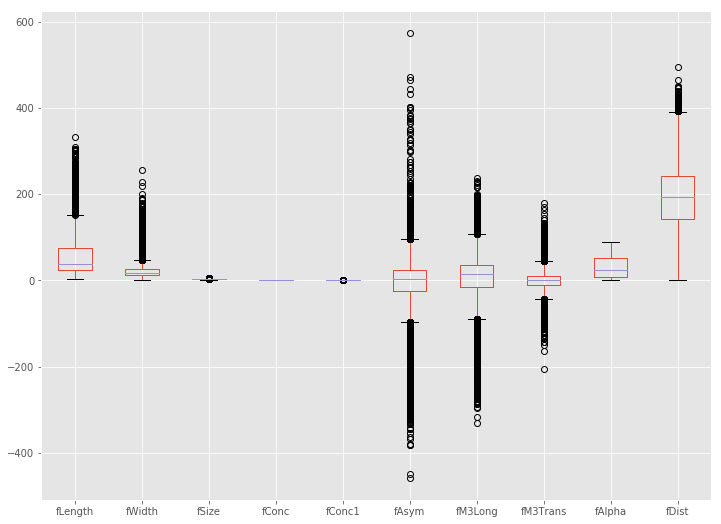

In [32]:
X.boxplot(figsize=(12,9))

**Observations:**  
1. There are no empty or missed values
2. Data is need to be normalized as the data attributes are very distinct in ranges
3. There are attributes that contains large number of outliers such as `fAsym` and `fLength`

#### 2.2. Correlation Matrix Plot

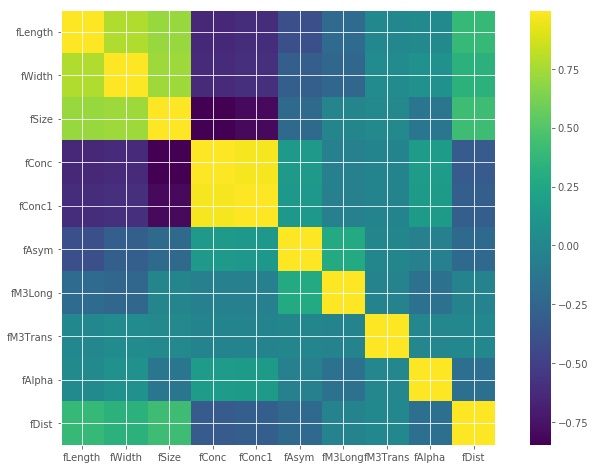

In [33]:
data_corr = X.corr()
plt.figure(figsize = (12,8))
plt.imshow(data_corr)
plt.colorbar()
plt.xticks(range(len(data_corr.columns)), data_corr.columns);
plt.yticks(range(len(data_corr.columns)), data_corr.columns);

**Observations:**  
1. `fConc` and `fConc1` seem to be very correlated with each other
2. `fConc` and `fConc1` seem also to be correlated with the first 3 attributes `fLength`, `fWidth` and `fSize`
3. `fSize` has correlation -almost=0.70- with `fLength` and `fWidth`
4. `fLength` and `fWidth` are correlated somehow wth correlation coefficient nearly = 0.75
4. other attributes seem to be uncorlleated

#### 2.3. Histograms Plot

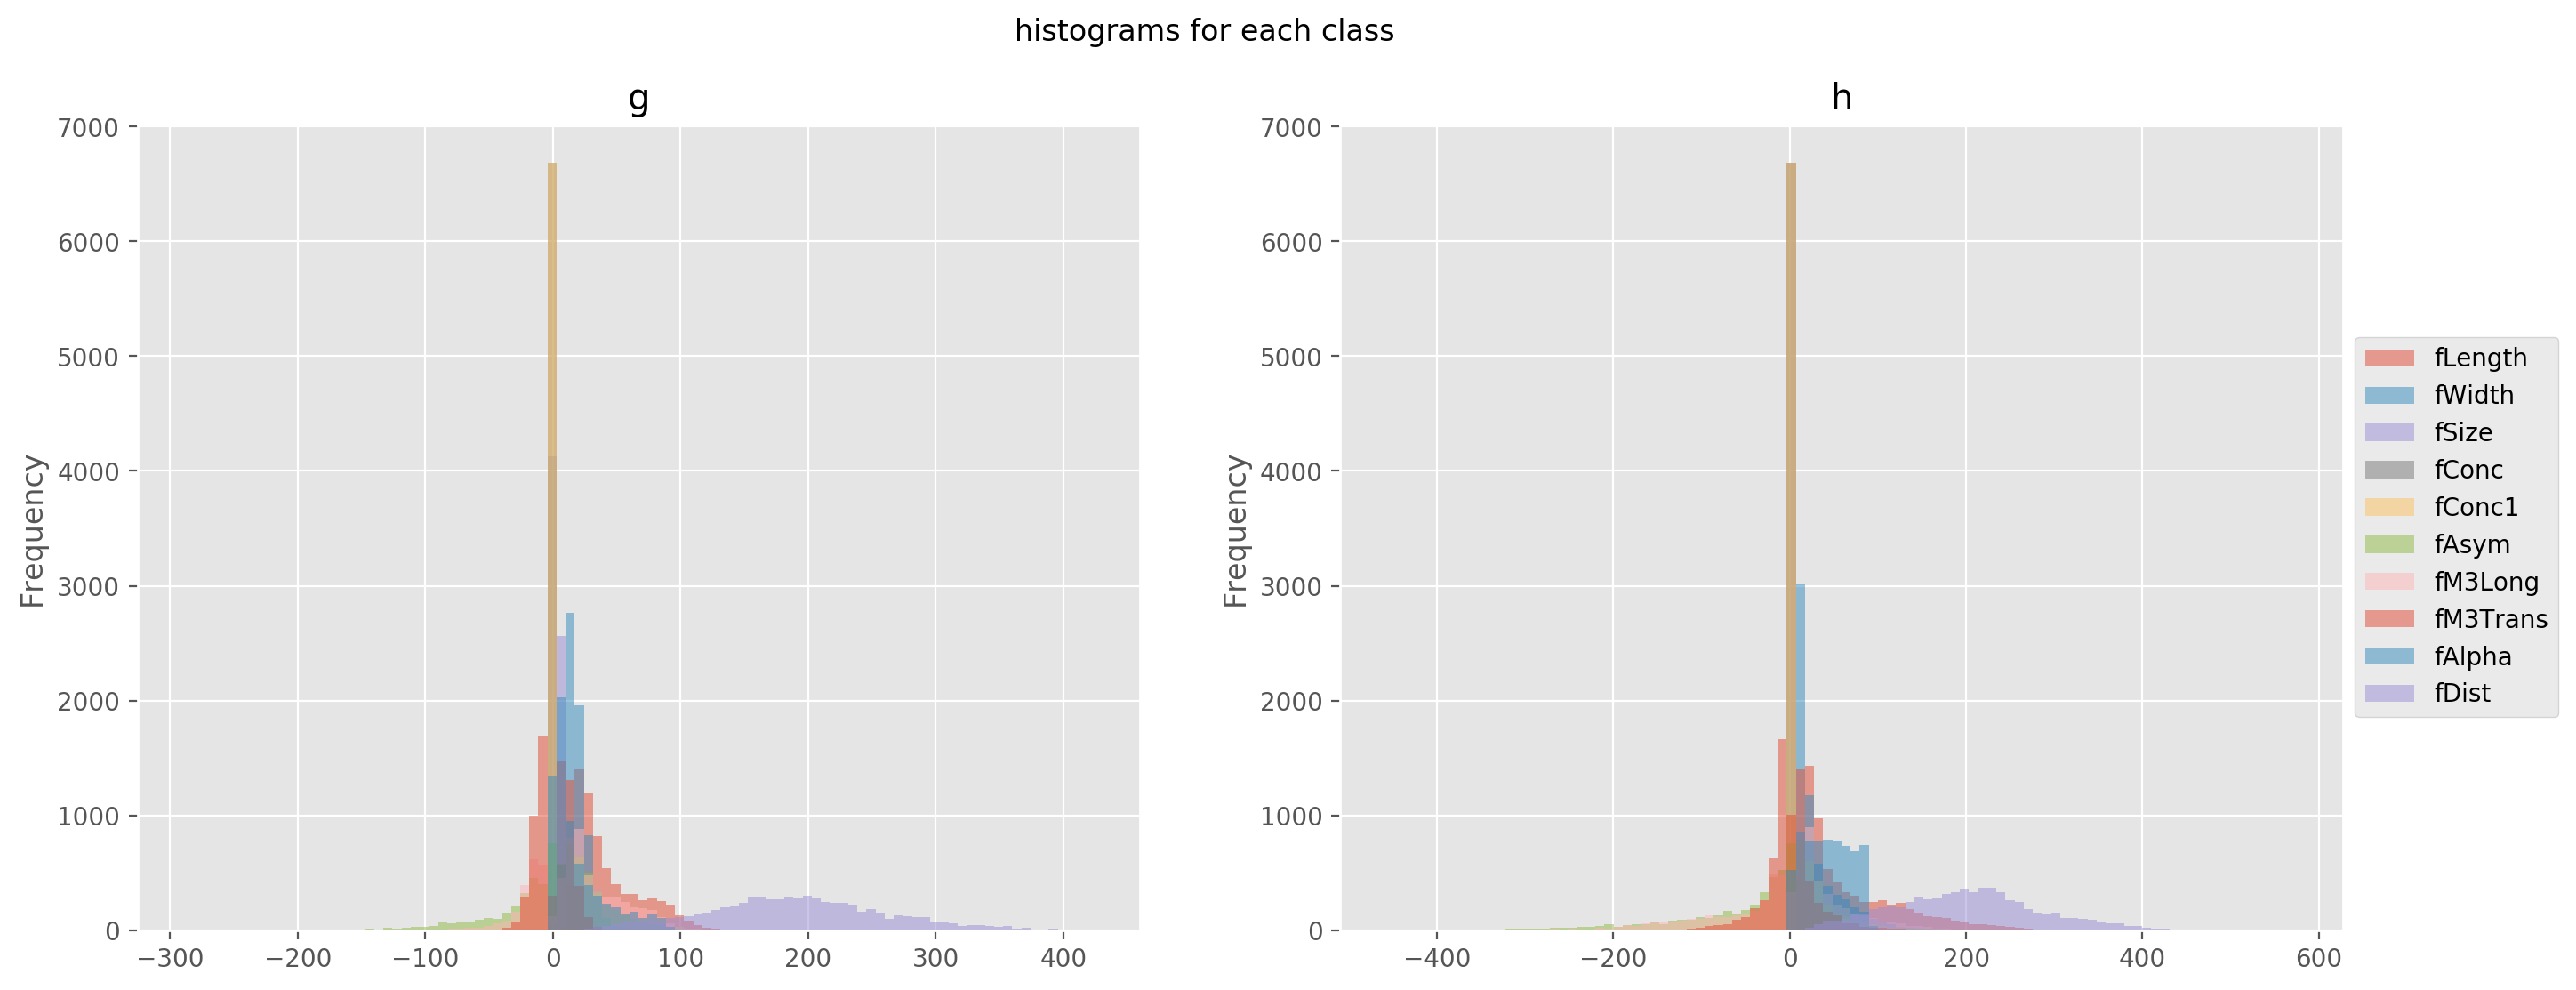

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_dpi(200)
fig.set_size_inches((16,6))
fig.suptitle("histograms for each class")
i = 0
for class_name in ["g","h"]:
    axes[i].set_title(class_name)
    class_data = balanced_data[balanced_data["class"] == class_name].drop("class", axis=1)
    hasLegend = True if i == 1 else False
    class_data.plot.hist(alpha=0.5, bins=100, ax = axes[i], legend=hasLegend)
    i+=1
axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

**Observations:**  
1. `g` class and `h` class have different distribution shapes at fAlpha `attribute`
2. `fConc` and `fConc1` are almost the same in the 2 classes
3. `h` range is between -400 and 600, on the other hand, `g` range is between -300 and 400 only

#### 2.4. Line Charts

In [35]:
plt.style.use('ggplot')
def lineChartPlot(attrs):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_dpi(200)
    fig.set_size_inches((16,6))
    fig.suptitle("Line charts for each class discretized into 100 intervals")
    i = 0
    for class_name in ["g","h"]:
        axes[i].set_title(class_name)
        disc_X = pd.DataFrame(columns=attrs);
        class_data = balanced_data[balanced_data["class"] == class_name].drop("class", axis=1)
        for col in attrs:
            disc_X[col] = pd.cut(class_data[col],100)
            categories = disc_X[col].cat.categories
            ind = np.array([x for x, _ in enumerate(categories)])
            grouped_X = disc_X.groupby(disc_X[col]).size()
            axes[i].plot(ind, grouped_X, label=col)
        axes[i].legend(loc='best')
        axes[i].set_xlabel("interval number")
        axes[i].set_ylabel("Frequency")
        i+=1


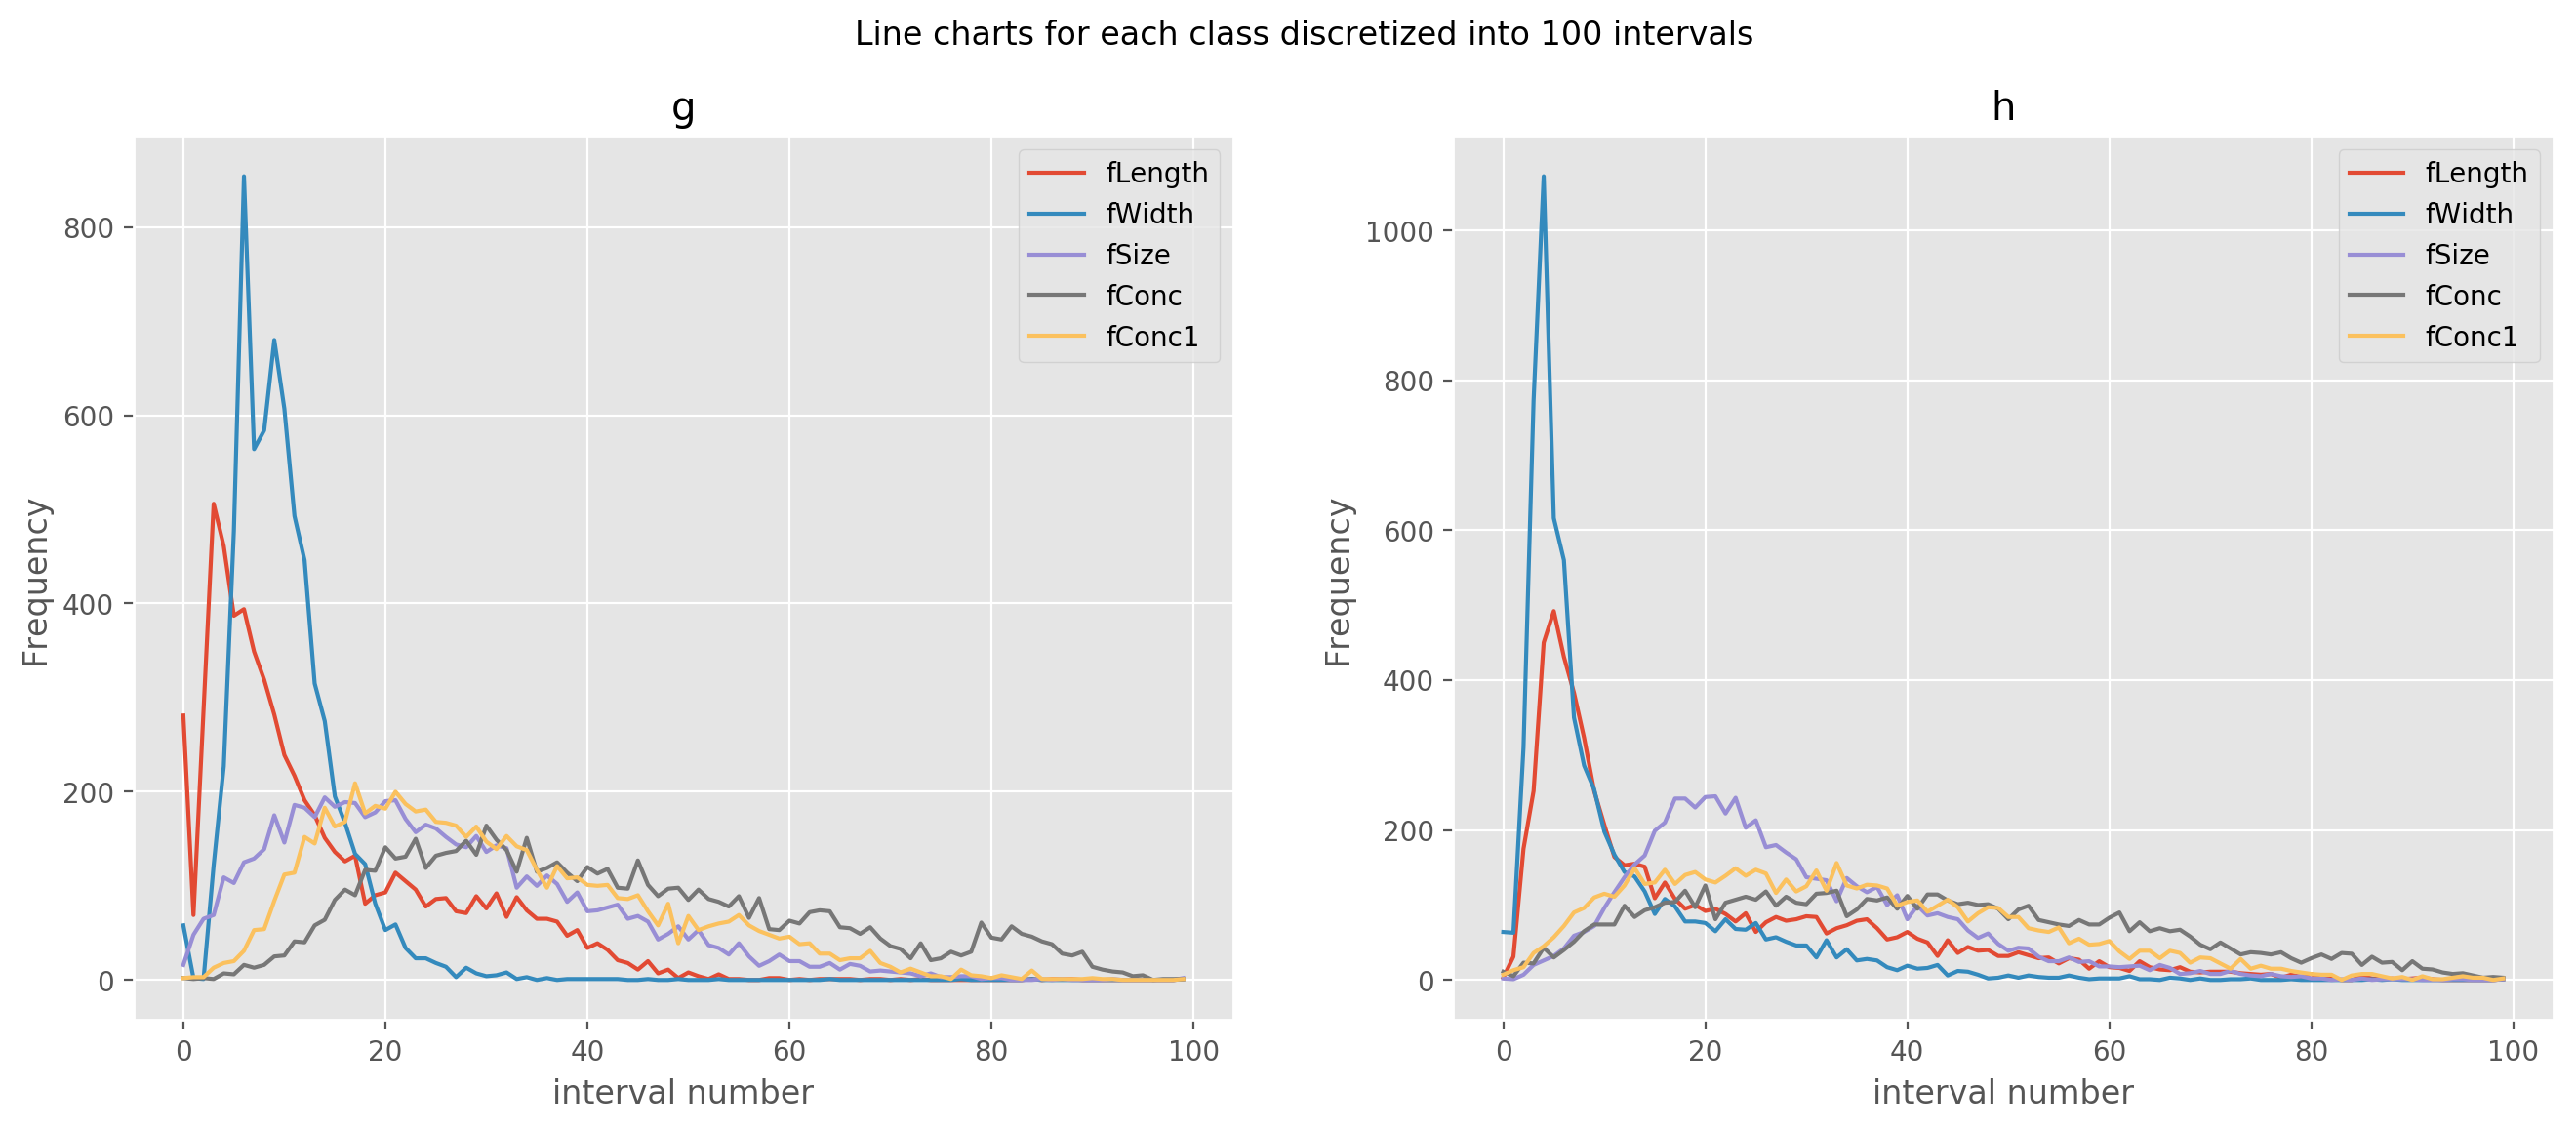

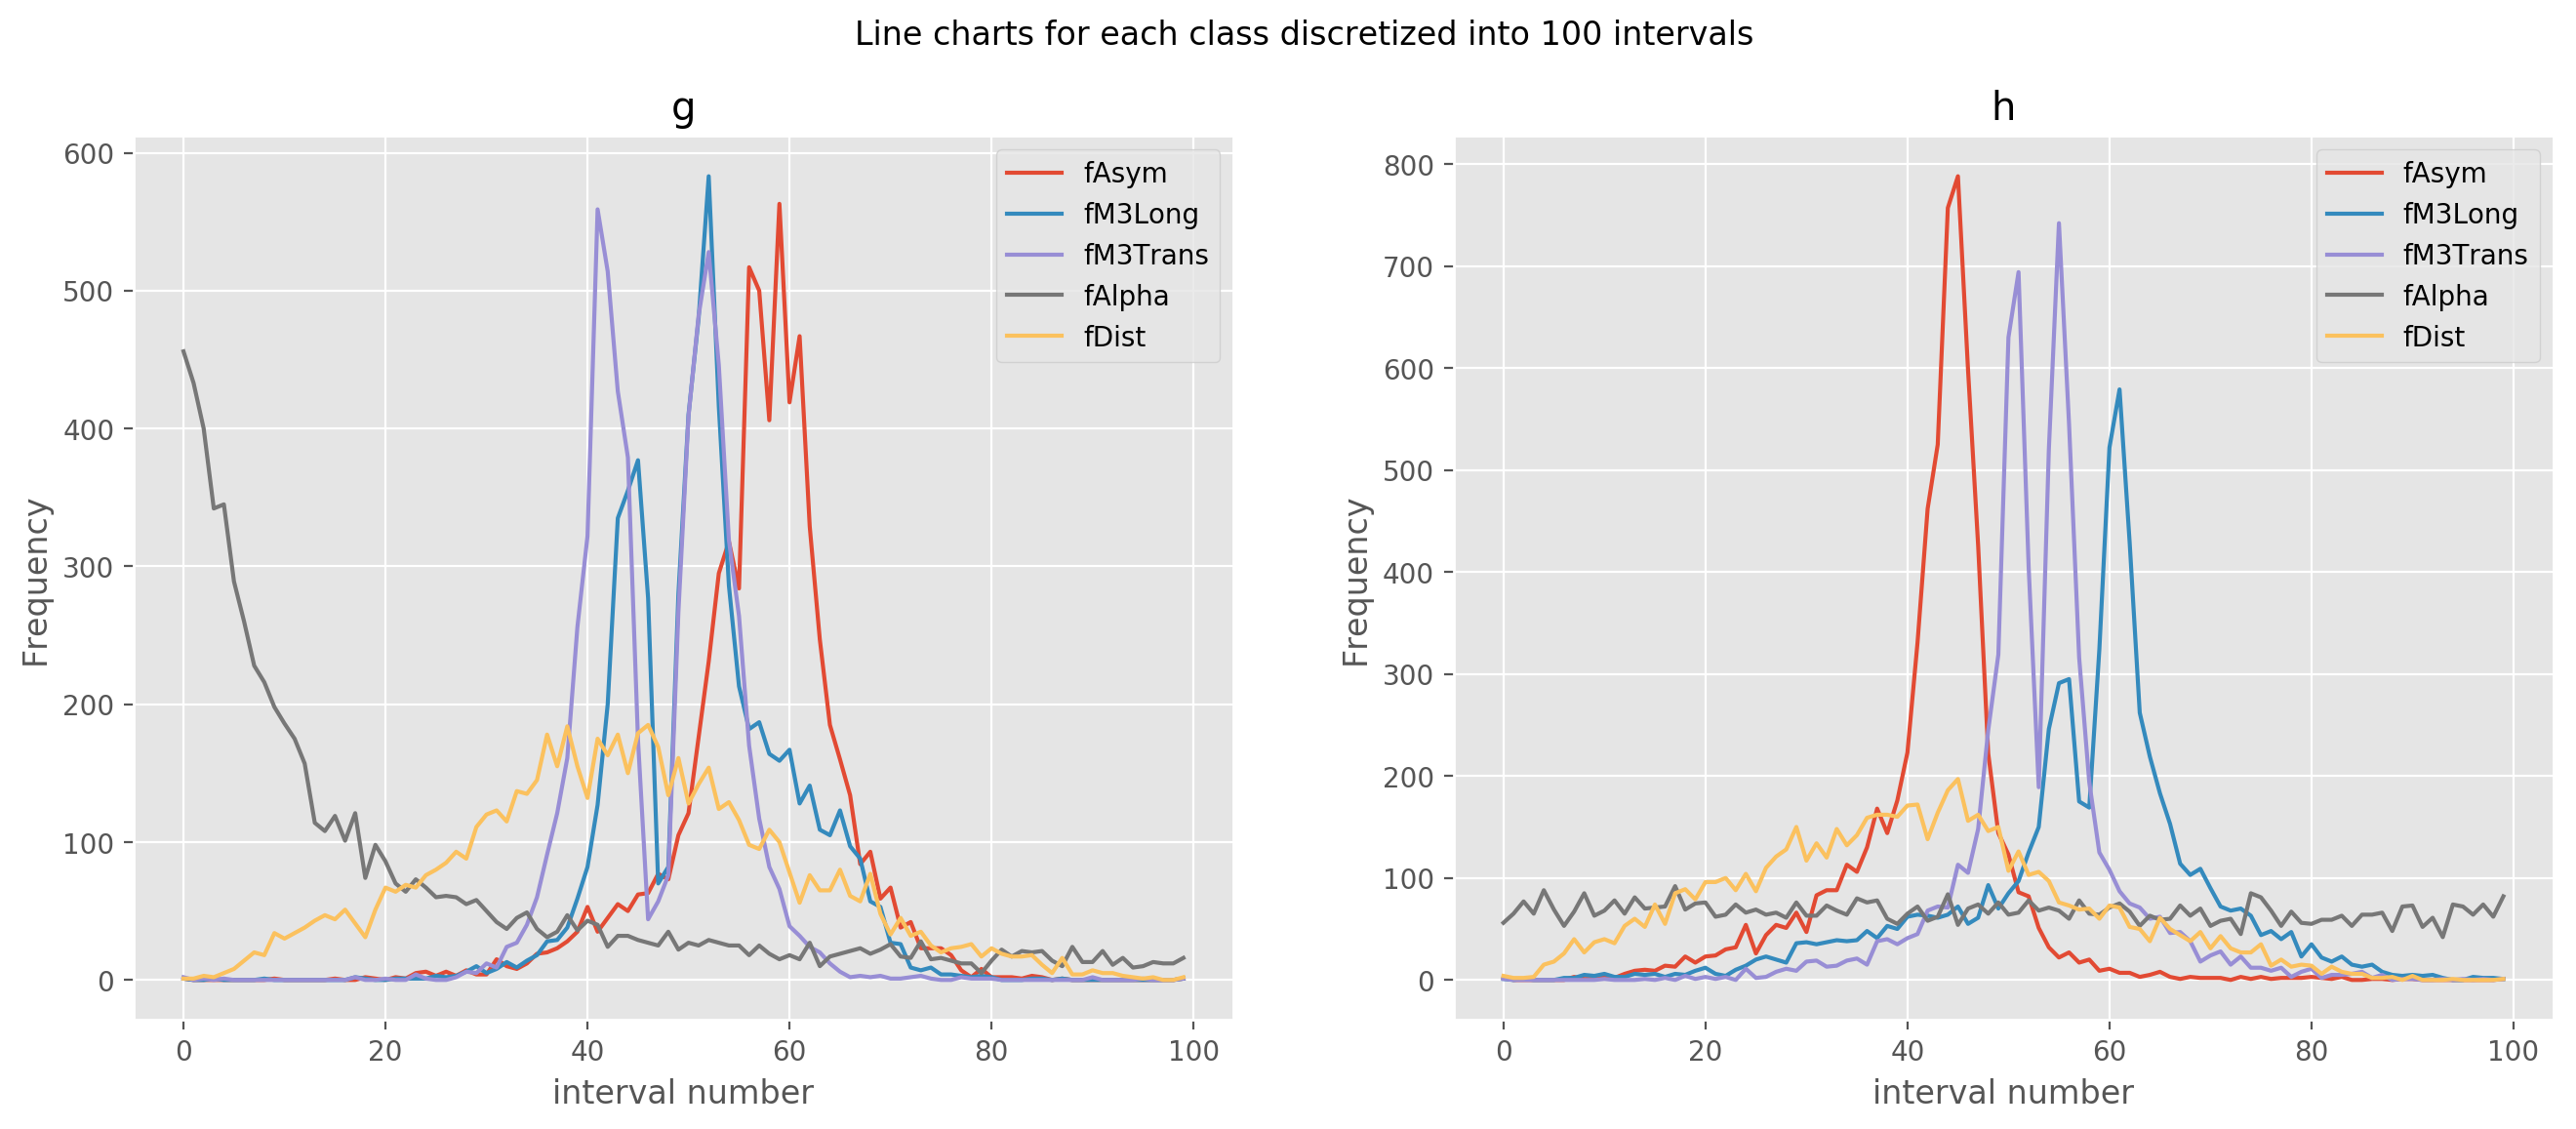

In [36]:
first_5_attrs = X.columns[:5]
last_5_attrs = X.columns[5:]
lineChartPlot(first_5_attrs)
lineChartPlot(last_5_attrs)

**Observation:**  
1. First thing to observe that the distribution of the first 2 attributes `flength` and `fwidth` are almost similar, the distribution of `fSize`, `fConc` and `fConc1` also are very close which confirm our observation that the first 2 varialbes set and the latter 3 variables set are correlated between each other.
2. Combaring each attribute in the 2 classes:
    - `fLength`: It has close distributions in the 2 classes, but we can observe that at the high values -i.e. intervals > 20 - it is more likely to be in `h` class rather than `g` class
    - `fWidth`: It is almost the same in the 2 classes which tell us that it more likely not to be useful in the classification task
    - `fSize`: As `fWidth`, it is more likely not to be useful
    - `fConc` - `fConc1`: also they are close in the 2 classes
    - `fAsym`: the two distributions show that in class values in intervals > interval #50 are more likely to be in class `g`, but values smaller than that are more likely to be in class `h` 
    - `fM3Long`: the two distributions show that in class values in intervals > interval #55 are more likely to be in class `h`, but values smaller than that can be in either of the 2 classes `g` or `h` 
    - `fM3Trans`: the two distributions show that in class values in intervals < interval #45 are more likely to be in class `g`, and values greater than that can be in either of the 2 classes `g` or `h` 
    - `fAlpha`: the disrtibutions tell us that samples have `fAlpha` values near to `0` are very likely to be in `g` class 
    - `fDist`: this attribute distribtion are almost the same in the 2 classes
---

**Conclusions after visualization:**
1. Data needs to be normalized
2. Data needs dimensionality reduction as some attributes seems to be useless
3. samples have low valus in `fAsym` are more likely to be in class `h` and high values are more likely to be in `g` class
4. samples have high values in `fM3Long` are more likely to be in class `h`, but viceversa not true
5. samples have low values in `fM3Trans` are more likely to be in class `g`,  but viceversa not true 
6. ssamples have `fAlpha` values near to 0 are more likely to be in class `g`, ,  but viceversa not true

---

### 3. Features Processing

#### 3.1. Data Normalization
we will normalize using z-score normalizer

In [37]:
def Z_score_normalizer(data):
    scaler = preprocessing.StandardScaler()
    scaled = scaler.fit_transform(data)
    return pd.DataFrame(scaled, columns=data.columns)

X = Z_score_normalizer(X)
X.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,-0.545334,-0.570593,-0.677815,0.815865,1.445389,0.517260,0.290698,-0.443219,-0.930536,0.130869
1,2.231728,5.371190,2.571184,-1.850154,-1.744440,1.898287,-1.284593,-1.960689,1.690679,0.805642
2,-0.711096,-0.673395,-1.056904,1.272372,1.577928,0.531587,-0.247304,-0.322450,-0.778752,-1.028398
3,0.381414,0.347005,0.675531,-0.338923,-0.281175,0.031828,0.374695,0.925256,-0.994133,2.110924
4,-0.191024,-0.301341,0.406168,-0.684548,-0.563154,0.247078,0.544215,0.440968,-0.988786,0.311928


#### 3.2. Features Projection and selection

In [38]:
components_n = [1, 2, 3, 4, 5, 6, 7, 8, 9 ,10]
ls = list()
for n in components_n:
    pca = PCA(n_components=n)
    pca.fit(X)
    var_ratios = pca.explained_variance_ratio_
    ls.append(sum(var_ratios))
res_df = pd.DataFrame(ls, columns=["captured variance"])
res_df["Number of components"] = components_n
display(res_df)

,captured variance,Number of components
0,0.424076,1
1,0.574356,2
2,0.676587,3
3,0.776359,4
4,0.851587,5
5,0.918223,6
6,0.960334,7
7,0.982082,8
8,0.997880,9
9,1.000000,10


**Observation:** As shown in the table, we can select the first 8 components of the pca as they capture 98% of the data variance and neglect the last 2.

In [39]:
pca = PCA(n_components=8)
pca.fit(X)
X_pca = pd.DataFrame(pca.transform(X))
X_pca.head()

,0,1,2,3,4,5,6,7
0,-1.758246,-0.477216,-1.034336,-0.001809,0.093985,0.428672,0.704201,-0.032272
1,5.611875,1.009385,2.103838,2.747549,0.494870,3.016724,1.741602,-1.414790
2,-2.555098,0.067783,-0.491574,0.083778,-0.760610,0.254440,0.899872,-0.019837
3,1.423371,-0.791503,-1.097922,-1.455603,0.966534,0.666366,-0.032527,-0.040680
4,0.578667,-1.328155,-0.271533,-0.600154,-0.256538,-0.090975,-0.290646,-0.004397


### 4. Data splitting

In [40]:
X_pre = balanced_data.drop("class", axis=1)
y_pre = balanced_data["class"]

# binarize label, let g = 0 and h = 1
lb1 = preprocessing.LabelBinarizer()
lb2 = preprocessing.LabelBinarizer()
y = lb1.fit_transform(y).ravel()
y_pre = lb2.fit_transform(y_pre).ravel()

In [41]:
# preprocessed data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# data without processing, this will be used to compare the results with the preprocessed data
X_train_pre, X_test_pre, y_train_pre, y_test_pre  = train_test_split(X_pre, y_pre, test_size=0.3, random_state=1)

---
## Classification

### 1. Create training and testing pipeline functions
This function is to evaluate the accuracy of a model, precision, recall, f1_score and confusion matrix with plotting

In [42]:
def accuracySummary(y_true, y_pred):
    print("<================= accuracy =================>")
    print(accuracy_score(y_true, y_pred))
    print("<================= precision,   recall,  f1_score =================>")
    print(classification_report(y_true, y_pred, target_names=['gammas','hadrons']))
    print("<================= confusionMatrix =================>")
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(conf_matrix)
    plt.matshow(conf_matrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Tune the paramters of a model and fit the data to it

In [60]:
def fit_tuneParameters(X_train, y_train, classifier, clf_params = None):
    if clf_params != None: # if there exist parameters to tune, tune the classifier
        clf = GridSearchCV(classifier, clf_params, cv=5,scoring='f1')   
    else:
        clf = classifier
    clf.fit(X_train, y_train)
    return clf

train, tune, test and evaluate a given classifier, and return the f1 score of the test set

In [61]:
def train_test_pipeline(classifier, X_train, y_train, X_test, y_test, clf_params=None):
    print("Classifier: {} is now being processed........".format(classifier.__class__.__name__))
    classifier = fit_tuneParameters(X_train, y_train, classifier, clf_params)
    if clf_params != None:
        print("Best Parameters for {} classifier : ".format(classifier.__class__.__name__), classifier.best_params_)
    y_pred = classifier.predict(X_test)
    accuracySummary(y_test, y_pred)
    return f1_score(y_test, y_pred)

### 2. Creating models

In [62]:
decTree_params = None
AdaBoost_params = [{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 100]}] # default is 50
KNN_params = [{'n_neighbors': [2, 3, 4, 5, 6, 8, 10, 15]}] # default is 5
randomF_params = [{'n_estimators': [5, 10, 20, 40, 50, 70, 100, 110, 120, 150]}] # default is 10 to 100
SVC_params = [{'kernel': ['linear'], 'C': [0.1, 0.3, 0.6, 0.8, 1, 3, 5,10, 100]}] # defaul is 1
gnb_params = None

params_list = [decTree_params, AdaBoost_params, KNN_params, randomF_params, gnb_params]
models_list = [DecisionTreeClassifier(), AdaBoostClassifier(), KNeighborsClassifier(), RandomForestClassifier(), GaussianNB()]

### 3. Train, Test and evaluate models 
#### 3.1. On the data without preprocessing

Classifier: DecisionTreeClassifier is now being processed........
<================= accuracy =================>
0.7866932469474209
<================= precision,   recall,  f1_score =================>
              precision    recall  f1-score   support

      gammas       0.78      0.79      0.79      2009
     hadrons       0.79      0.78      0.79      2004

   micro avg       0.79      0.79      0.79      4013
   macro avg       0.79      0.79      0.79      4013
weighted avg       0.79      0.79      0.79      4013

<================= confusionMatrix =================>
[[1592  417]
 [ 439 1565]]


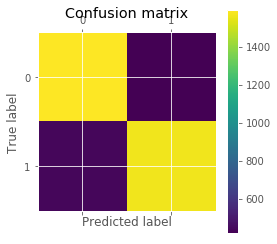

Classifier: AdaBoostClassifier is now being processed........
Best Parameters for GridSearchCV classifier :  {'n_estimators': 100}
<================= accuracy =================>
0.8240717667580364
<================= precision,   recall,  f1_score =================>
              precision    recall  f1-score   support

      gammas       0.83      0.82      0.82      2009
     hadrons       0.82      0.83      0.82      2004

   micro avg       0.82      0.82      0.82      4013
   macro avg       0.82      0.82      0.82      4013
weighted avg       0.82      0.82      0.82      4013

<================= confusionMatrix =================>
[[1650  359]
 [ 347 1657]]


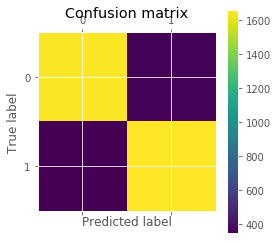

Classifier: KNeighborsClassifier is now being processed........
Best Parameters for GridSearchCV classifier :  {'n_neighbors': 5}
<================= accuracy =================>
0.7557936705706454
<================= precision,   recall,  f1_score =================>
              precision    recall  f1-score   support

      gammas       0.73      0.82      0.77      2009
     hadrons       0.79      0.69      0.74      2004

   micro avg       0.76      0.76      0.76      4013
   macro avg       0.76      0.76      0.75      4013
weighted avg       0.76      0.76      0.75      4013

<================= confusionMatrix =================>
[[1646  363]
 [ 617 1387]]


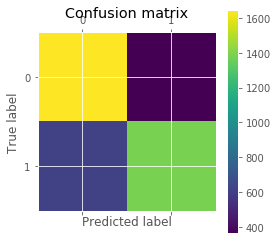

Classifier: RandomForestClassifier is now being processed........
Best Parameters for GridSearchCV classifier :  {'n_estimators': 110}
<================= accuracy =================>
0.8594567655120857
<================= precision,   recall,  f1_score =================>
              precision    recall  f1-score   support

      gammas       0.84      0.88      0.86      2009
     hadrons       0.88      0.84      0.86      2004

   micro avg       0.86      0.86      0.86      4013
   macro avg       0.86      0.86      0.86      4013
weighted avg       0.86      0.86      0.86      4013

<================= confusionMatrix =================>
[[1773  236]
 [ 328 1676]]


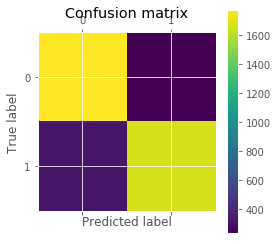

Classifier: GaussianNB is now being processed........
<================= accuracy =================>
0.6523797657612759
<================= precision,   recall,  f1_score =================>
              precision    recall  f1-score   support

      gammas       0.60      0.89      0.72      2009
     hadrons       0.79      0.41      0.54      2004

   micro avg       0.65      0.65      0.65      4013
   macro avg       0.70      0.65      0.63      4013
weighted avg       0.70      0.65      0.63      4013

<================= confusionMatrix =================>
[[1796  213]
 [1182  822]]


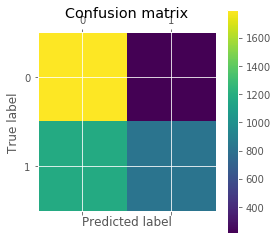

In [63]:
preProc_f1 = list() # f1 score on the data before preprocessing 
for model,params in zip(models_list,params_list):
    preProc_f1.append(train_test_pipeline(model, X_train_pre, y_train_pre, X_test_pre, y_test_pre, params))

 #### 3.2.On the preprocessed data

Classifier: DecisionTreeClassifier is now being processed........
<================= accuracy =================>
0.7871916272115624
<================= precision,   recall,  f1_score =================>
              precision    recall  f1-score   support

      gammas       0.79      0.79      0.79      2009
     hadrons       0.79      0.78      0.79      2004

   micro avg       0.79      0.79      0.79      4013
   macro avg       0.79      0.79      0.79      4013
weighted avg       0.79      0.79      0.79      4013

<================= confusionMatrix =================>
[[1589  420]
 [ 434 1570]]


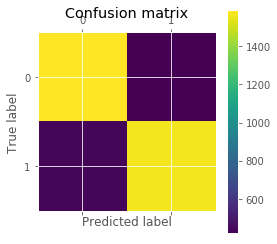

Classifier: AdaBoostClassifier is now being processed........
Best Parameters for GridSearchCV classifier :  {'n_estimators': 100}
<================= accuracy =================>
0.8240717667580364
<================= precision,   recall,  f1_score =================>
              precision    recall  f1-score   support

      gammas       0.83      0.82      0.82      2009
     hadrons       0.82      0.83      0.82      2004

   micro avg       0.82      0.82      0.82      4013
   macro avg       0.82      0.82      0.82      4013
weighted avg       0.82      0.82      0.82      4013

<================= confusionMatrix =================>
[[1650  359]
 [ 347 1657]]


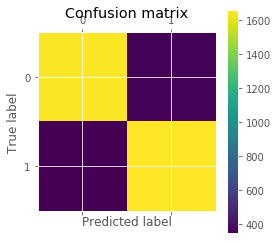

Classifier: KNeighborsClassifier is now being processed........
Best Parameters for GridSearchCV classifier :  {'n_neighbors': 5}
<================= accuracy =================>
0.7989035634188886
<================= precision,   recall,  f1_score =================>
              precision    recall  f1-score   support

      gammas       0.76      0.86      0.81      2009
     hadrons       0.84      0.73      0.78      2004

   micro avg       0.80      0.80      0.80      4013
   macro avg       0.80      0.80      0.80      4013
weighted avg       0.80      0.80      0.80      4013

<================= confusionMatrix =================>
[[1735  274]
 [ 533 1471]]


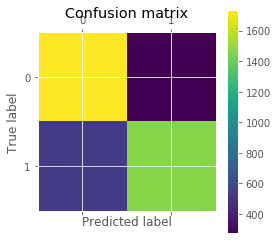

Classifier: RandomForestClassifier is now being processed........
Best Parameters for GridSearchCV classifier :  {'n_estimators': 120}
<================= accuracy =================>
0.8569648641913781
<================= precision,   recall,  f1_score =================>
              precision    recall  f1-score   support

      gammas       0.84      0.88      0.86      2009
     hadrons       0.88      0.83      0.85      2004

   micro avg       0.86      0.86      0.86      4013
   macro avg       0.86      0.86      0.86      4013
weighted avg       0.86      0.86      0.86      4013

<================= confusionMatrix =================>
[[1775  234]
 [ 340 1664]]


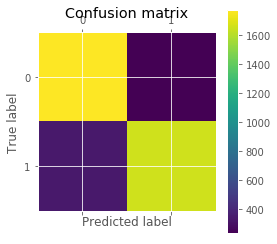

Classifier: GaussianNB is now being processed........
<================= accuracy =================>
0.6523797657612759
<================= precision,   recall,  f1_score =================>
              precision    recall  f1-score   support

      gammas       0.60      0.89      0.72      2009
     hadrons       0.79      0.41      0.54      2004

   micro avg       0.65      0.65      0.65      4013
   macro avg       0.70      0.65      0.63      4013
weighted avg       0.70      0.65      0.63      4013

<================= confusionMatrix =================>
[[1796  213]
 [1182  822]]


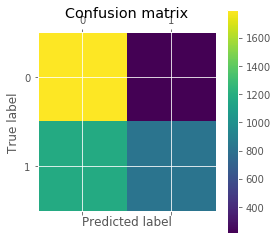

In [64]:
afterProc_f1 = list() # f1 score on the data after preprocessing 
for model,params in zip(models_list,params_list):
    afterProc_f1.append(train_test_pipeline(model, X_train, y_train, X_test, y_test, params))

In [94]:
df = pd.DataFrame(columns=['classifier', 'f1 before processing', 'f1 after processing'])
df['classifier'] = ["Decision Tree", "AdaBoost", "KNeighbors", "RandomForest", "GaussianNB"]
df['f1 before processing'] = preProc_f1
df['f1 after processing'] = afterProc_f1
df = df.set_index('classifier')

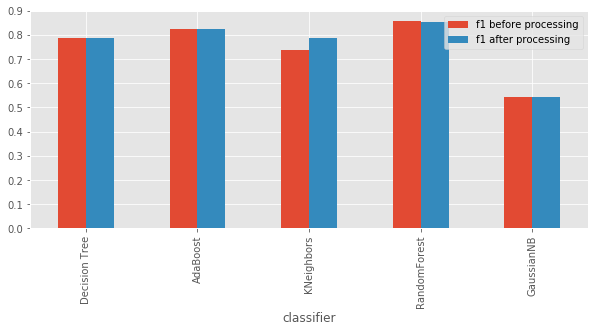

In [104]:
df.plot.bar(figsize=(10,4))

**Observation:**
KNN is the most sensitive classifier to the data preprocessing